In [1]:
import pandas as pd
import networkx as nx
from datetime import datetime
import matplotlib.pyplot as plt

In [65]:
routes_df = pd.read_csv('finalroutes.csv')
trips_df = pd.read_csv('trips.txt')
stops_df=pd.read_csv('stops.csv')
stop_times_df=pd.read_csv('stop_times.txt')
metro_stops_df=pd.read_csv('metro_stops.csv')
stop_map_df=pd.read_csv('stop_map.csv')
trip_sample_df=pd.read_csv('tripssample.csv')

In [3]:
columns_to_drop = ['business_date', 'trip_date','boarding_date']  
trip_sample_df= trip_sample_df.drop(columns=columns_to_drop)

In [4]:
trip_sample_df

,bus_id,route_id,start_line,end_line,stop_id,stop_name,stop_lon,stop_lat,trip_start_time,boarding_time
0,8908,5702,Lusail Bus Station,Al Khor Aquatic Center,74011,Al Khor Community South Stop 1,51.529483,25.722127,14:07:17,14:29:05
1,8908,5702,Lusail Bus Station,Al Khor Aquatic Center,74153,Bus Stop 74153,51.520431,25.716622,16:42:47,18:07:16
2,8884,5702,Lusail Bus Station,Al Khor Aquatic Center,74153,Bus Stop 74153,51.520431,25.716622,10:37:56,12:01:31
3,8526,5702,Lusail Bus Station,Al Khor Aquatic Center,74153,Bus Stop 74153,51.520431,25.716622,22:48:24,23:55:38
4,8526,5702,Lusail Bus Station,Al Khor Aquatic Center,74153,Bus Stop 74153,51.520431,25.716622,14:52:20,16:02:10
...,...,...,...,...,...,...,...,...,...,...
38842,7868,2116,Umm Ghuwailina Station,Cring-Umm Ghuwailina,27028,Al Fateh,51.550945,25.276580,10:22:41,10:43:07
38843,7868,2116,Umm Ghuwailina Station,Cring-Umm Ghuwailina,27028,Al Fateh,51.550945,25.276580,17:58:34,18:21:43
38844,7868,2116,Umm Ghuwailina Station,Cring-Umm Ghuwailina,27028,Al Fateh,51.550945,25.276580,20:45:01,21:06:33
38845,8627,5702,Lusail Bus Station,Al Khor Aquatic Center,74014,Dolphin Stop 1,51.541982,25.718072,13:41:58,15:11:12


In [5]:
stops_df

,stop_id,stop_name,stop_lat,stop_lon,wheelchair_boarding,stop_url,location_type,parent_station
0,57609,Stop 7 South West Side East Industrial Road 57609,25.207189,51.444488,0,NaN,0,NaN
1,4000,Msheireb Bus Station Next to Ent 1 of Msheireb...,25.281366,51.526020,0,NaN,0,NaN
2,31604,Stop 1 East Side Environment Street. Al Duhail...,25.335813,51.474935,0,NaN,0,NaN
3,31606,Stop 2 East Side Environment Street. Al Duhail...,25.341427,51.470985,0,NaN,0,NaN
4,51634,Bus Stop 51634,25.342320,51.450018,0,NaN,0,NaN
...,...,...,...,...,...,...,...,...
2862,51032,Bus Stop 51032,25.322669,51.388366,0,NaN,0,NaN
2863,51085,Bu Slaila St.,25.337411,51.442417,0,NaN,0,NaN
2864,51048,Bus Stop 51048,25.338533,51.387164,0,NaN,0,NaN
2865,56611,Bus Stop 56611,25.223724,51.452143,0,NaN,0,NaN


In [6]:
stops_df

,stop_id,stop_name,stop_lat,stop_lon,wheelchair_boarding,stop_url,location_type,parent_station
0,57609,Stop 7 South West Side East Industrial Road 57609,25.207189,51.444488,0,NaN,0,NaN
1,4000,Msheireb Bus Station Next to Ent 1 of Msheireb...,25.281366,51.526020,0,NaN,0,NaN
2,31604,Stop 1 East Side Environment Street. Al Duhail...,25.335813,51.474935,0,NaN,0,NaN
3,31606,Stop 2 East Side Environment Street. Al Duhail...,25.341427,51.470985,0,NaN,0,NaN
4,51634,Bus Stop 51634,25.342320,51.450018,0,NaN,0,NaN
...,...,...,...,...,...,...,...,...
2862,51032,Bus Stop 51032,25.322669,51.388366,0,NaN,0,NaN
2863,51085,Bu Slaila St.,25.337411,51.442417,0,NaN,0,NaN
2864,51048,Bus Stop 51048,25.338533,51.387164,0,NaN,0,NaN
2865,56611,Bus Stop 56611,25.223724,51.452143,0,NaN,0,NaN


In [7]:
routes_df.head()

,route_id,agency_id,route_short_name,start_line,end_line,route_type,route_desc,route_color,route_text_color,route_url
0,5708,1,R708,Education City Bus Station,Dukhan,3,NaN,FF0000,FFFFFF,NaN
1,4602,1,T602,Industrial Area Bus Station,Mushereib Bus Station,3,NaN,0A137D,FFFFFF,NaN
2,3508,1,L508,Industrial Area Bus Station,Al Rayyan Al Jadeed,3,NaN,FF0000,FFFFFF,NaN
3,4604,1,T604,Industrial Area Bus Station,Mushereib Bus Station,3,NaN,0B6D73,FFFFFF,NaN
4,3524,1,L524,Al Sudan Bus Station,Barwa Al Baraha Labor Camp,3,NaN,FF0000,FFFFFF,NaN


In [8]:
routes_df=routes_df.drop(columns=['agency_id','route_type','route_desc','route_color','route_text_color','route_url'])

In [9]:
routes_df

,route_id,route_short_name,start_line,end_line
0,5708,R708,Education City Bus Station,Dukhan
1,4602,T602,Industrial Area Bus Station,Mushereib Bus Station
2,3508,L508,Industrial Area Bus Station,Al Rayyan Al Jadeed
3,4604,T604,Industrial Area Bus Station,Mushereib Bus Station
4,3524,L524,Al Sudan Bus Station,Barwa Al Baraha Labor Camp
...,...,...,...,...
117,3541,L541,Mesaieed,Mesaieed City Road
118,3542,L542,Al Wakra Bus Station,Muaither Al Wukair
119,2202,M202,Education City Metro Station,Al Gharafa
120,2203,M203,Education City Station,Al Gharafa


In [10]:
trips_df

,route_id,service_id,trip_id,direction_id,shape_id,trip_headsign,trip_short_name,wheelchair_accessible,bikes_allowed
0,5708,3,77937,0,57080,Education City Bus Station Via Dukhan,NaN,0,0
1,5708,3,77936,0,57080,Education City Bus Station Via Dukhan,NaN,0,0
2,5708,3,77935,0,57080,Education City Bus Station Via Dukhan,NaN,0,0
3,5708,3,77934,0,57080,Education City Bus Station Via Dukhan,NaN,0,0
4,5708,2,98861,0,57080,Education City Bus Station Via Dukhan,NaN,0,0
...,...,...,...,...,...,...,...,...,...
31141,2202,4,54542,0,22020,Education City Station - Circular Via Al Gharrafa,NaN,0,0
31142,2202,4,54541,0,22020,Education City Station - Circular Via Al Gharrafa,NaN,0,0
31143,2202,3,54377,0,22020,Education City Station - Circular Via Al Gharrafa,NaN,0,0
31144,2202,3,54376,0,22020,Education City Station - Circular Via Al Gharrafa,NaN,0,0


In [11]:
trips_df=trips_df.drop(columns=['service_id','direction_id','shape_id','trip_headsign','trip_short_name','wheelchair_accessible','bikes_allowed'])

In [12]:
trips_df

,route_id,trip_id
0,5708,77937
1,5708,77936
2,5708,77935
3,5708,77934
4,5708,98861
...,...,...
31141,2202,54542
31142,2202,54541
31143,2202,54377
31144,2202,54376


In [13]:
stop_times_df

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type
0,68289,04:26:55,04:26:55,39601,3,NaN,NaN
1,68290,04:56:55,04:56:55,39601,3,NaN,NaN
2,68845,04:26:55,04:26:55,39601,3,NaN,NaN
3,68846,04:56:55,04:56:55,39601,3,NaN,NaN
4,69401,04:26:55,04:26:55,39601,3,NaN,NaN
...,...,...,...,...,...,...,...
876212,61290,14:15:55,14:15:55,68501,21,NaN,NaN
876213,61291,14:27:55,14:27:55,68501,21,NaN,NaN
876214,61292,14:39:55,14:39:55,68501,21,NaN,NaN
876215,61293,14:51:55,14:51:55,68501,21,NaN,NaN


In [14]:
stop_times_df=stop_times_df.drop(columns=['departure_time','pickup_type','drop_off_type'])

In [15]:
stop_times_df

,trip_id,arrival_time,stop_id,stop_sequence
0,68289,04:26:55,39601,3
1,68290,04:56:55,39601,3
2,68845,04:26:55,39601,3
3,68846,04:56:55,39601,3
4,69401,04:26:55,39601,3
...,...,...,...,...
876212,61290,14:15:55,68501,21
876213,61291,14:27:55,68501,21
876214,61292,14:39:55,68501,21
876215,61293,14:51:55,68501,21


In [16]:
stop_map_df

,route_id,stop_id,stop_sequence
0,013630,600,0
1,013630,1312,1
2,013630,2316,2
3,013630,2320,3
4,013630,3924,4
...,...,...,...
11870,021470,69006,17
11871,021470,69004,18
11872,021470,69002,19
11873,021470,66100,20


In [17]:
metro_stops_df

,stop_id,stop_name
0,4101,Msheireb Metro Station Al Diwan Street
1,4500,Msheireb Metro Station
2,5438,Al Waab Metro Station
3,12500,Corniche Metro Station
4,13001,Msheireb Metro Station
...,...,...
62,91501,Ras Bu Fontas Metro Station
63,91600,Al Wakra Metro Station
64,91601,Al Wakra Metro Station
65,NaN,NaN


In [18]:

# Preprocess Data
G = nx.Graph()

In [20]:

# Calculate the distance between two points using the Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon / 2) * math.sin(dlon / 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    return distance

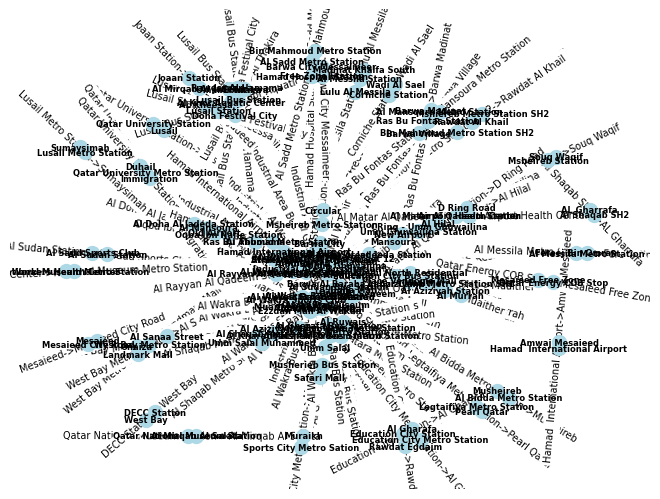

In [23]:

# Add nodes (bus stops) to the graph
G.add_nodes_from(routes_df['start_line'])
G.add_nodes_from(routes_df['end_line'])

# Add edges (routes) to the graph
G.add_edges_from(routes_df[['start_line', 'end_line']].to_records(index=False))

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=100, node_color='lightblue', font_size=6, font_weight='bold', arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(n1, n2): f'{n1}->{n2}' for n1, n2 in G.edges()}, font_size=7)
plt.show()

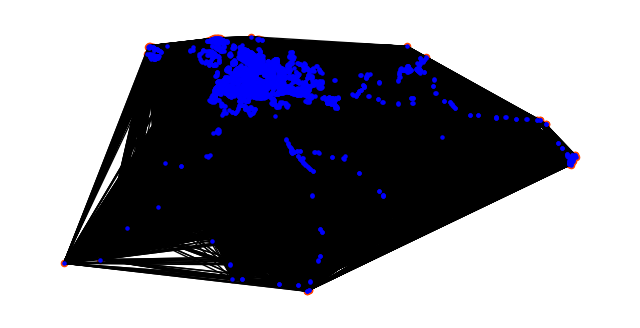

In [27]:
from libpysal import weights
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import geopandas as gpd

# Read your data from a file or other source
# Replace "your_data.csv" with your actual file name or path
your_data = gpd.read_file("stops.csv")

# Convert latitude and longitude columns to numeric values
your_data['stop_lat'] = pd.to_numeric(your_data['stop_lat'], errors='coerce')
your_data['stop_lon'] = pd.to_numeric(your_data['stop_lon'], errors='coerce')

# Drop rows with missing values
your_data = your_data.dropna(subset=['stop_lat', 'stop_lon'])

# Construct the array of coordinates for the centroid
coordinates = np.column_stack((your_data['stop_lat'], your_data['stop_lon']))

# Construct a weights matrix based on your specific use case
# For example, you might use the DistanceBand weights
# Replace the threshold value with your specific value
dist = weights.DistanceBand.from_array(coordinates, threshold=50)

# Convert the weights matrix to a NetworkX graph
your_graph = dist.to_networkx()

# Plot the graph along with your original data
plt.figure(figsize=(8, 4))
your_data.plot.scatter('stop_lat', 'stop_lon', color='orangered', ax=plt.gca())
nx.draw(your_graph, pos=dict(zip(your_graph.nodes, coordinates)), ax=plt.gca(), node_size=5, node_color="b")
plt.show()


In [29]:

# Add nodes for each stop
for idx, row in stops_df.iterrows():
    G.add_node(row['stop_id'], pos=(row['stop_lon'], row['stop_lat']))


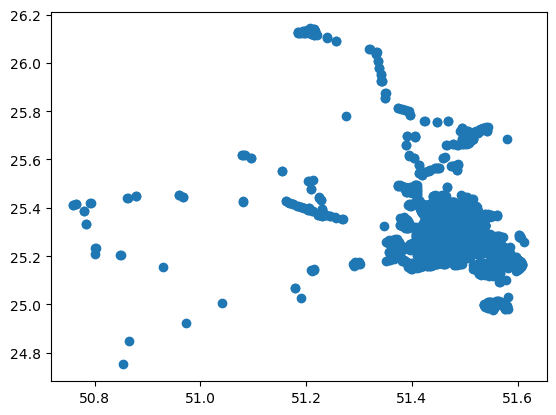

In [30]:

plt.scatter(x=stops_df['stop_lon'], y=stops_df['stop_lat'])
plt.show()

C:\Users\kosman\AppData\Local\Temp\ipykernel_15496\2442848739.py:17: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  doha = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


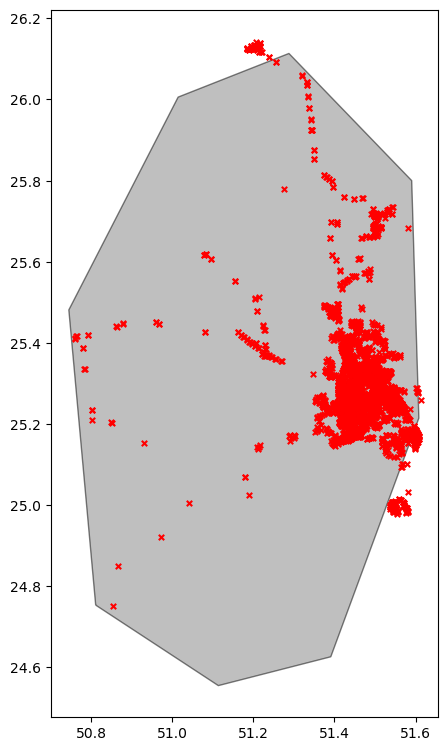

In [31]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt



# Load bus stop data from CSV file
df = pd.read_csv("stops.csv", delimiter=',', skiprows=0, low_memory=False)

# Create a GeoDataFrame from the DataFrame, specifying the geometry column
geometry = [Point(xy) for xy in zip(df['stop_lon'], df['stop_lat'])]
gdf = GeoDataFrame(df, geometry=geometry)   

# Load map data for Doha from GeoPandas dataset
doha = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
doha = doha[doha['name'] == 'Qatar']

# Plot the map of Doha and the bus stop locations
fig, ax = plt.subplots(figsize=(5, 10))
doha.plot(ax=ax, alpha=0.5, color='gray', edgecolor='black')
gdf.plot(ax=ax, marker='x', color='red', markersize=15)
plt.show()

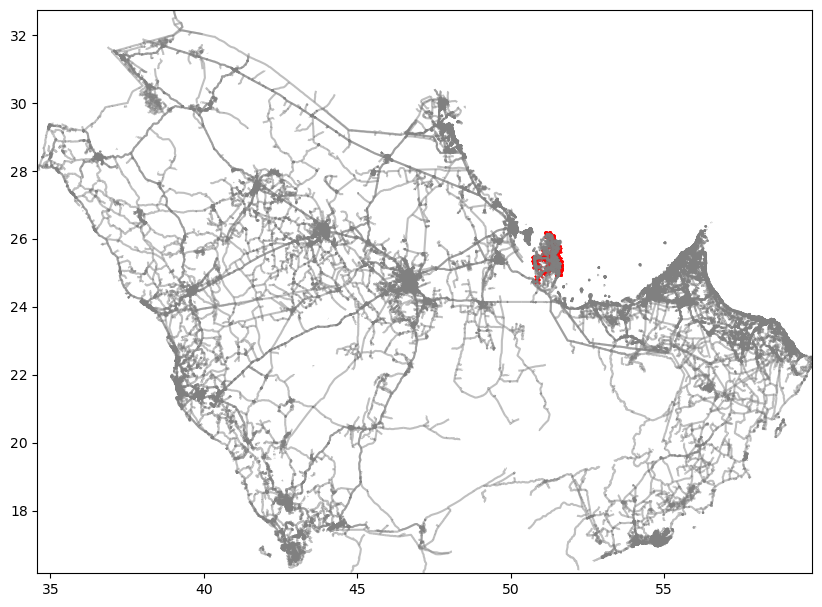

In [32]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import os

# Set SHAPE_RESTORE_SHX environment variable to YES
os.environ['SHAPE_RESTORE_SHX'] = 'YES'

# Load bus stop data from CSV file
df = pd.read_csv("stops.csv", delimiter=',', skiprows=0, low_memory=False)

# Create a GeoDataFrame from the DataFrame, specifying the geometry column
geometry = [Point(xy) for xy in zip(df['stop_lon'], df['stop_lat'])]
gdf = GeoDataFrame(df, geometry=geometry)

# Load a map of Doha
doha = gpd.read_file("roads.shp")  # Replace "path/to/doha_map.shp" with the actual path to your Doha map shapefile
doha.set_crs(epsg=4326, inplace=True)  # Assuming the Doha map is in WGS84

# Set the CRS of the bus stop data
gdf.crs = 'EPSG:4326'  # Assuming the bus stop data is in WGS84

# Ensure the coordinates of the bus stops are in the same coordinate system as the map
gdf = gdf.to_crs(epsg=doha.crs.to_epsg())

# Plot the map of Doha and the bus stop locations
fig, ax = plt.subplots(figsize=(10, 10))
doha.plot(ax=ax, alpha=0.5, color='gray', edgecolor='black')
gdf.plot(ax=ax, marker='x', color='red', markersize=15)

# Set the axis limits to focus on Doha
xmin, ymin, xmax, ymax = doha.total_bounds
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

plt.show()


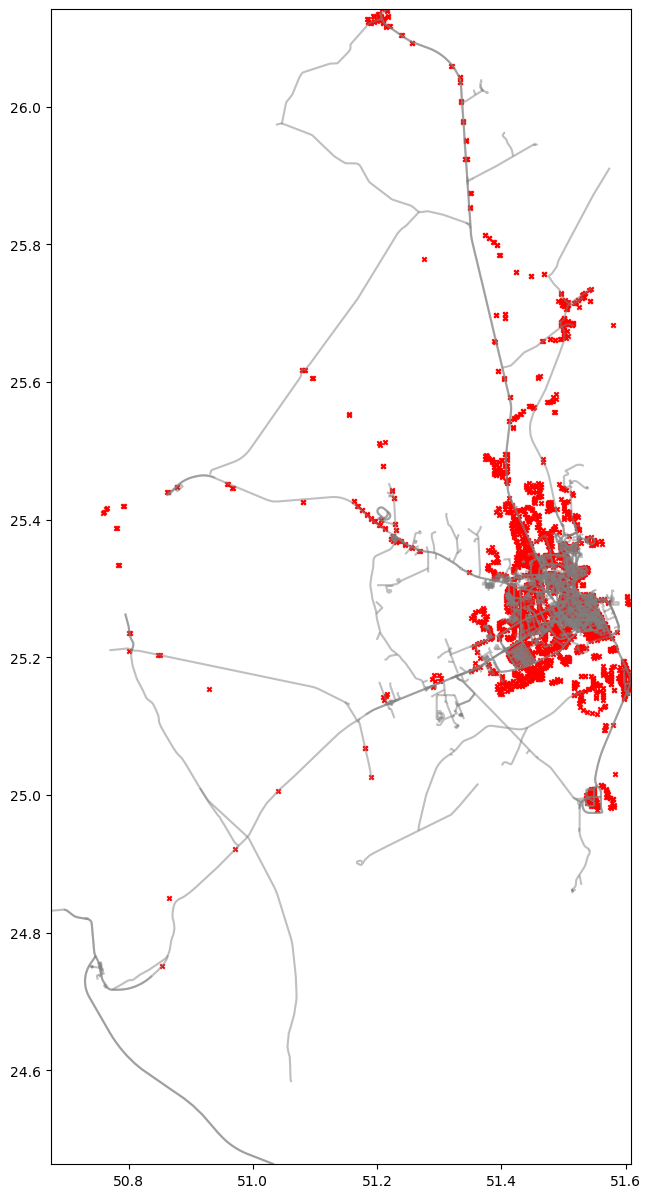

In [33]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import os

# Set SHAPE_RESTORE_SHX environment variable to YES
os.environ['SHAPE_RESTORE_SHX'] = 'YES'

# Load bus stop data from CSV file
df = pd.read_csv("stops.csv", delimiter=',', skiprows=0, low_memory=False)

# Create a GeoDataFrame from the DataFrame, specifying the geometry column
geometry = [Point(xy) for xy in zip(df['stop_lon'], df['stop_lat'])]
gdf = GeoDataFrame(df, geometry=geometry)

# Load a map of Doha
doha = gpd.read_file("qatar_highway.shp")  # Replace "path/to/doha_map.shp" with the actual path to your Doha map shapefile
doha.set_crs(epsg=4326, inplace=True)  # Assuming the Doha map is in WGS84

# Set the CRS of the bus stop data
gdf.crs = 'EPSG:4326'  # Assuming the bus stop data is in WGS84

# Ensure the coordinates of the bus stops are in the same coordinate system as the map
gdf = gdf.to_crs(epsg=doha.crs.to_epsg())

# Plot the map of Doha and the bus stop locations
fig, ax = plt.subplots(figsize=(15, 15))
doha.plot(ax=ax, alpha=0.5, color='gray', edgecolor='black')
gdf.plot(ax=ax, marker='x', color='red', markersize=10)

# Set the axis limits to focus on Doha
xmin, ymin, xmax, ymax = doha.total_bounds
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

plt.show()


C:\Users\kosman\AppData\Local\Temp\ipykernel_15496\1304379705.py:19: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  doha = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


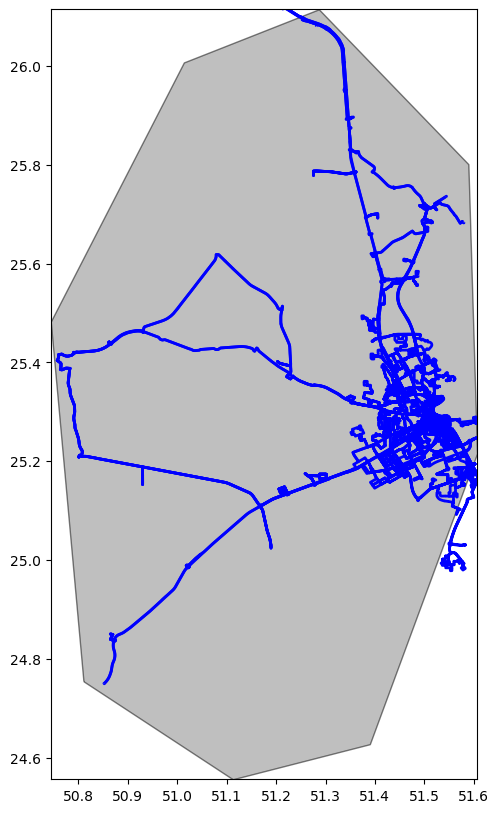

In [34]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString

# Load the shape.txt file into a DataFrame
shapes_df = pd.read_csv('shapes.txt')

# Group the DataFrame by shape_id and aggregate the latitude and longitude
# values into a LineString geometry for each shape_id
shape_gdf = shapes_df.groupby('shape_id').apply(
    lambda x: LineString(zip(x['shape_pt_lon'], x['shape_pt_lat']))
).reset_index(name='geometry')

# Convert the DataFrame to a GeoDataFrame
shape_gdf = gpd.GeoDataFrame(shape_gdf, geometry='geometry')

# Load a map of Doha
doha = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
doha = doha[doha['name'] == 'Qatar']

# Plot the map of Doha and the route geometries
fig, ax = plt.subplots(figsize=(10, 10))
doha.plot(ax=ax, alpha=0.5, color='gray', edgecolor='black')
shape_gdf.plot(ax=ax, color='blue', linewidth=2)

# Set the axis limits to focus on Doha
xmin, ymin, xmax, ymax = doha.total_bounds
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

plt.show()


In [35]:
import pandas as pd

# Read the shape.txt file into a DataFrame
shape_df = pd.read_csv('shapes.txt')

# Group the DataFrame by shape_id and count the number of rows for each group
shape_id_counts = shape_df.groupby('shape_id').size()

# Identify the shape IDs with fewer than 2 points (rows)
problematic_shape_ids = shape_id_counts[shape_id_counts < 2].index

# Print the shape IDs with fewer than 2 points (rows)
print("Shape IDs with fewer than 2 points (rows):", problematic_shape_ids)


Shape IDs with fewer than 2 points (rows): Index([], dtype='int64', name='shape_id')


In [36]:
# Filter the DataFrame for the rows with the problematic shape ID
problematic_shape_rows = shape_df[shape_df['shape_id'] == 123456]

# Print the problematic rows
print("Rows with the problematic shape ID:")
print(problematic_shape_rows)


Rows with the problematic shape ID:
Empty DataFrame
Columns: [shape_id, shape_pt_lat, shape_pt_lon, shape_pt_sequence]
Index: []


<Axes: >

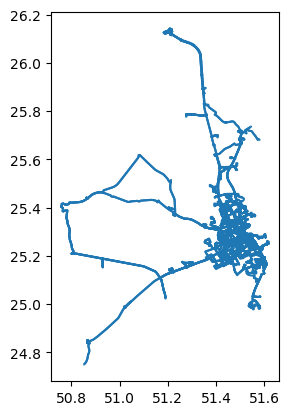

In [38]:
from shapely.geometry import LineString, Point
import pandas as pd

# Read the shape.txt file into a DataFrame
df = pd.read_csv('shapes.txt')

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.shape_pt_lon, df.shape_pt_lat))

# Group the GeoDataFrame by shape_id and aggregate the points into a LineString geometry
grouped = gdf.groupby('shape_id')['geometry'].apply(lambda x: LineString(x.tolist())).reset_index()

# Convert the DataFrame to a GeoDataFrame
shape_gdf = gpd.GeoDataFrame(grouped, geometry='geometry')

# Plot the shape file
shape_gdf.plot()


In [39]:
# Check for column names in your DataFrame
print(routes_df.columns)

# Check if 'route_id' is in the columns
if 'route_id' in routes_df.columns:
    print("Column 'route_id' exists.")
else:
    print("Column 'route_id' does not exist.")


Index(['route_id', 'route_short_name', 'start_line', 'end_line'], dtype='object')
Column 'route_id' exists.


In [40]:
filtered_routes = routes_df[routes_df['route_id'] == '05708']


In [41]:
print(routes_df['route_id'].unique())


[5708 4602 3508 4604 3524 3522 2124 2147 2208 4601 4610 4611 3518 3520
 2143 2115 2209 3504  757 2138 2108 2152 5707 2315 2111 3510 2105 3509
 5705 3516 3527 4603 2311 2106 3528 4650 5709 2134 2110 3507 2109 3514
 3531 2132 5722 2118 3513 3501 3525 4606 2107 3503 5701 3515 2205 4614
 2139 2123 2314 4613 4616 2210 4605 5710 2140 2146 3530 4612 2303 2306
 2113 2149 3540 2126 2302 3538 2145 2128 2127 3505 2133 3529 3521 3506
 2120 4607 5702 3517 2312 5727 2112 2125 3543 3533 4609 4608 2114 2116
 5704 2130 2316 2122 3526 3532 3511 3502 2131 3519 3512 2129 2117 2121
 2207 2313 5706 3523 3544 3541 3542 2202 2203 2148]


In [42]:

filtered_routes

,route_id,route_short_name,start_line,end_line


In [43]:
print(routes_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   route_id          122 non-null    int64 
 1   route_short_name  122 non-null    object
 2   start_line        122 non-null    object
 3   end_line          122 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.9+ KB
None


In [44]:
filtered_routes = routes_df[routes_df['route_id'].astype(str) == '5708']


In [70]:
trip_sample_df

,business_date,bus_id,route_id,start_line,end_line,stop_id,stop_name,stop_lon,stop_lat,trip_date,trip_start_time,boarding_date,boarding_time
0,19/02/2024,8908,5702,Lusail Bus Station,Al Khor Aquatic Center,74011,Al Khor Community South Stop 1,51.529483,25.722127,19/02/2024,14:07:17,20240219,14:29:05
1,19/02/2024,8908,5702,Lusail Bus Station,Al Khor Aquatic Center,74153,Bus Stop 74153,51.520431,25.716622,19/02/2024,16:42:47,20240219,18:07:16
2,19/02/2024,8884,5702,Lusail Bus Station,Al Khor Aquatic Center,74153,Bus Stop 74153,51.520431,25.716622,19/02/2024,10:37:56,20240219,12:01:31
3,19/02/2024,8526,5702,Lusail Bus Station,Al Khor Aquatic Center,74153,Bus Stop 74153,51.520431,25.716622,19/02/2024,22:48:24,20240219,23:55:38
4,19/02/2024,8526,5702,Lusail Bus Station,Al Khor Aquatic Center,74153,Bus Stop 74153,51.520431,25.716622,19/02/2024,14:52:20,20240219,16:02:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38842,19/02/2024,7868,2116,Umm Ghuwailina Station,Cring-Umm Ghuwailina,27028,Al Fateh,51.550945,25.276580,19/02/2024,10:22:41,20240219,10:43:07
38843,19/02/2024,7868,2116,Umm Ghuwailina Station,Cring-Umm Ghuwailina,27028,Al Fateh,51.550945,25.276580,19/02/2024,17:58:34,20240219,18:21:43
38844,19/02/2024,7868,2116,Umm Ghuwailina Station,Cring-Umm Ghuwailina,27028,Al Fateh,51.550945,25.276580,19/02/2024,20:45:01,20240219,21:06:33
38845,19/02/2024,8627,5702,Lusail Bus Station,Al Khor Aquatic Center,74014,Dolphin Stop 1,51.541982,25.718072,19/02/2024,13:41:58,20240219,15:11:12


In [45]:
routes_df

,route_id,route_short_name,start_line,end_line
0,5708,R708,Education City Bus Station,Dukhan
1,4602,T602,Industrial Area Bus Station,Mushereib Bus Station
2,3508,L508,Industrial Area Bus Station,Al Rayyan Al Jadeed
3,4604,T604,Industrial Area Bus Station,Mushereib Bus Station
4,3524,L524,Al Sudan Bus Station,Barwa Al Baraha Labor Camp
...,...,...,...,...
117,3541,L541,Mesaieed,Mesaieed City Road
118,3542,L542,Al Wakra Bus Station,Muaither Al Wukair
119,2202,M202,Education City Metro Station,Al Gharafa
120,2203,M203,Education City Station,Al Gharafa


In [113]:
filtered_routes = routes_df[routes_df['route_id'] == 5702]

In [114]:
filtered_routes

,route_id,agency_id,route_short_name,start_line,end_line,route_type,route_desc,route_color,route_text_color,route_url
86,5702,1,R702,Lusail Bus Station,Al Khor Aquatic Center,3,NaN,FF0000,FFFFFF,NaN


In [71]:
filtered_trips = trip_sample_df[trip_sample_df['route_id'] == 5702]

In [72]:
filtered_trips

,business_date,bus_id,route_id,start_line,end_line,stop_id,stop_name,stop_lon,stop_lat,trip_date,trip_start_time,boarding_date,boarding_time
0,19/02/2024,8908,5702,Lusail Bus Station,Al Khor Aquatic Center,74011,Al Khor Community South Stop 1,51.529483,25.722127,19/02/2024,14:07:17,20240219,14:29:05
1,19/02/2024,8908,5702,Lusail Bus Station,Al Khor Aquatic Center,74153,Bus Stop 74153,51.520431,25.716622,19/02/2024,16:42:47,20240219,18:07:16
2,19/02/2024,8884,5702,Lusail Bus Station,Al Khor Aquatic Center,74153,Bus Stop 74153,51.520431,25.716622,19/02/2024,10:37:56,20240219,12:01:31
3,19/02/2024,8526,5702,Lusail Bus Station,Al Khor Aquatic Center,74153,Bus Stop 74153,51.520431,25.716622,19/02/2024,22:48:24,20240219,23:55:38
4,19/02/2024,8526,5702,Lusail Bus Station,Al Khor Aquatic Center,74153,Bus Stop 74153,51.520431,25.716622,19/02/2024,14:52:20,20240219,16:02:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38344,19/02/2024,8877,5702,Lusail Bus Station,Al Khor Aquatic Center,74654,Ansar Gallery,51.500643,25.666286,19/02/2024,9:10:23,20240219,10:05:04
38345,19/02/2024,8877,5702,Lusail Bus Station,Al Khor Aquatic Center,74654,Ansar Gallery,51.500643,25.666286,19/02/2024,5:11:12,20240219,6:04:13
38346,19/02/2024,8613,5702,Lusail Bus Station,Al Khor Aquatic Center,74654,Ansar Gallery,51.500643,25.666286,19/02/2024,17:08:14,20240219,17:58:57
38845,19/02/2024,8627,5702,Lusail Bus Station,Al Khor Aquatic Center,74014,Dolphin Stop 1,51.541982,25.718072,19/02/2024,13:41:58,20240219,15:11:12


In [94]:
unique_stops = filtered_trips['stop_id'].unique()
list_of_unique_stops = unique_stops.tolist()

print(list_of_unique_stops )

[74011, 74153, 74662, 74014, 74672, 74679, 8897, 9560, 74676, 74658, 9556, 9540, 74569, 70693, 74636, 70001, 9538, 74634, 9548, 74617, 70694, 74015, 74659, 74009, 74660, 74632, 75046, 70607, 74663, 70608, 74005, 70000, 75045, 74631, 74670, 74699, 74654]


In [297]:
filtered_stop_lon = filtered_trips[filtered_trips['stop_id'].astype(str) == "8897"]

In [298]:
filtered_trips.dtypes

business_date       object
bus_id               int64
route_id             int64
start_line          object
end_line            object
stop_id              int64
stop_name           object
stop_lon           float64
stop_lat           float64
trip_date           object
trip_start_time     object
boarding_date        int64
boarding_time       object
dtype: object

In [299]:
filtered_stop_lon

,business_date,bus_id,route_id,start_line,end_line,stop_id,stop_name,stop_lon,stop_lat,trip_date,trip_start_time,boarding_date,boarding_time
2520,19/02/2024,8908,5702,Lusail Bus Station,Al Khor Aquatic Center,8897,Al Khor South,51.49925,25.67696,19/02/2024,14:07:17,20240219,14:54:03
2521,19/02/2024,8908,5702,Lusail Bus Station,Al Khor Aquatic Center,8897,Al Khor South,51.49925,25.67696,19/02/2024,18:14:22,20240219,19:00:18
2522,19/02/2024,8884,5702,Lusail Bus Station,Al Khor Aquatic Center,8897,Al Khor South,51.49925,25.67696,19/02/2024,7:05:31,20240219,7:56:23
2523,19/02/2024,8884,5702,Lusail Bus Station,Al Khor Aquatic Center,8897,Al Khor South,51.49925,25.67696,19/02/2024,12:09:24,20240219,12:57:29
2524,19/02/2024,8627,5702,Lusail Bus Station,Al Khor Aquatic Center,8897,Al Khor South,51.49925,25.67696,19/02/2024,11:16:08,20240219,12:00:39
2525,19/02/2024,8627,5702,Lusail Bus Station,Al Khor Aquatic Center,8897,Al Khor South,51.49925,25.67696,19/02/2024,15:17:52,20240219,16:00:55
2526,19/02/2024,8882,5702,Lusail Bus Station,Al Khor Aquatic Center,8897,Al Khor South,51.49925,25.67696,19/02/2024,6:04:09,20240219,7:03:20
2527,19/02/2024,8882,5702,Lusail Bus Station,Al Khor Aquatic Center,8897,Al Khor South,51.49925,25.67696,19/02/2024,10:09:56,20240219,10:54:58
2528,19/02/2024,8899,5702,Lusail Bus Station,Al Khor Aquatic Center,8897,Al Khor South,51.49925,25.67696,19/02/2024,8:13:46,20240219,9:03:02
2529,19/02/2024,8751,5702,Lusail Bus Station,Al Khor Aquatic Center,8897,Al Khor South,51.49925,25.67696,19/02/2024,22:06:03,20240219,22:54:56


In [300]:
stop_lon=51.49925
stop_lat=25.67696

for stop=9548

In [244]:
filtered_stop_lon = filtered_trips[filtered_trips['stop_id'].astype(str) == "70001"]

In [245]:
filtered_stop_lon

,business_date,bus_id,route_id,start_line,end_line,stop_id,stop_name,stop_lon,stop_lat,trip_date,trip_start_time,boarding_date,boarding_time
13678,19/02/2024,8627,5702,Lusail Bus Station,Al Khor Aquatic Center,70001,Simaisma Port,51.484424,25.55701,19/02/2024,13:41:58,20240219,14:12:43


In [246]:
dest_lon=51.484424
dest_lat=25.55701

In [301]:
# Find the nearest stop to the city center of Doha
min_distance = float('inf')
nearest_stop_id = None
for idx, row in stops_df.iterrows():
    distance = haversine(stop_lat,stop_lon, row['stop_lat'], row['stop_lon'])
    if distance < min_distance:
        min_distance = distance
        nearest_stop_id = row['stop_id']
        nearest_stop_name = row['stop_name']
print(f"The nearest stop to your location is '{nearest_stop_name}' with a distance of {min_distance} km.")

The nearest stop to your location is 'Al Khor South' with a distance of 0.0 km.


In [284]:
# Find the nearest stop to the city center of Doha
min_distance = float('inf')
nearest_stop_id_dest = None
for idx, row in stops_df.iterrows():
    distance = haversine(dest_lat,dest_lon, row['stop_lat'], row['stop_lon'])
    if distance < min_distance:
        min_distance = distance
        nearest_stop_id_dest = row['stop_id']
        nearest_stop_name_dest = row['stop_name']
print(f"The nearest stop to your location is '{nearest_stop_name_dest}' with a distance of {min_distance} km.")

The nearest stop to your location is 'Simaisma Port' with a distance of 0.0 km.


In [285]:
distance_between_stops = haversine(stop_lat, stop_lon, dest_lat, dest_lon)
print(f"The distance between the two stops is {distance_between_stops} km.")

The distance between the two stops is 1.9106485609888721 km.


In [286]:
import networkx as nx

# Create a graph to represent the transportation network
G = nx.Graph()
# Add nodes for all bus stops
for stop_id in filtered_trips['stop_id']:
    G.add_node(stop_id)

In [287]:
print(f"nearest_stop_id: {nearest_stop_id}, nearest_stop_id_dest: {nearest_stop_id_dest}")


nearest_stop_id: 70607, nearest_stop_id_dest: 70001


In [288]:
# Add edges for all routes
for idx, row in filtered_trips.iterrows():
    stop1 = nearest_stop_id
    stop2 = nearest_stop_id_dest
    G.add_edge(stop1, stop2)


In [291]:
# Check if the graph is connected
is_connected = nx.is_connected(G)
print(f"Is the graph connected? {is_connected}")

Is the graph connected? False


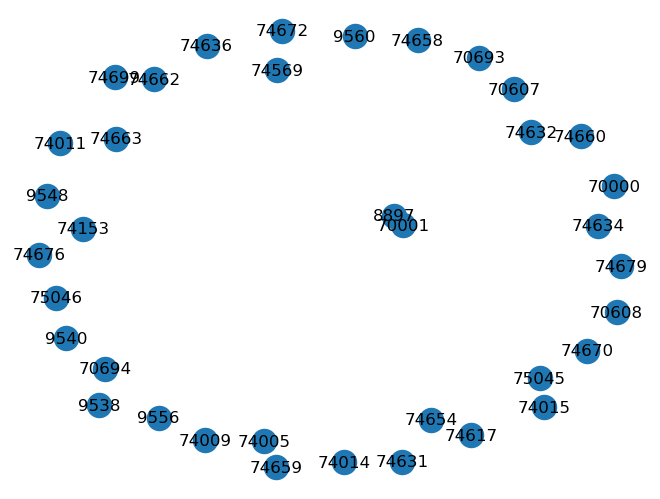

In [256]:
# Visualize the graph
nx.draw(G, with_labels=True)
plt.show()

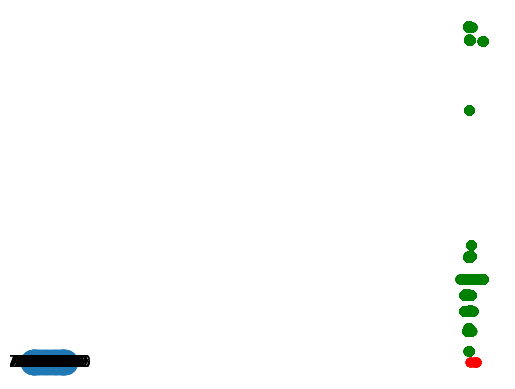

In [257]:
route_shape_points = []
# Read the shape.txt file and extract the shape points (latitude and longitude coordinates)
with open('shapes.txt', 'r') as f:
    next(f)  # Skip the first line (header)
    for line in f:
        shape_point = line.split(',')
        latitude = float(shape_point[0])
        longitude = float(shape_point[1])
        
        # Plot the shape point
        plt.plot(longitude, latitude, marker='o', color='g')

# Plot the stops
for stop_id in G.nodes():
    stop_coordinates = (stops_df[stops_df['stop_id'] == stop_id]['stop_lat'].iloc[0], 
                        stops_df[stops_df['stop_id'] == stop_id]['stop_lon'].iloc[0])
    plt.plot(*stop_coordinates, marker='o', color='r')

# Connect the stops along the route shape
for idx in range(len(route_shape_points) - 1):
    G.add_edge(route_shape_points[idx], route_shape_points[idx + 1])

# Visualize the graph
nx.draw(G, with_labels=True)
plt.show()

<Axes: >

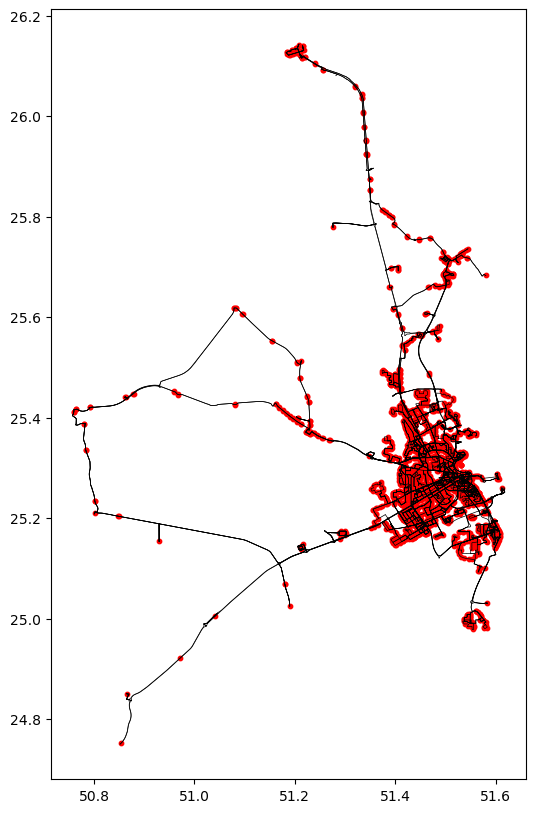

In [258]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt

# Read the shape.txt file into a DataFrame
df = pd.read_csv('shapes.txt')

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.shape_pt_lon, df.shape_pt_lat))

# Read the bus stops into a GeoDataFrame
stops_df = pd.read_csv('stops.csv')
stops_gdf = gpd.GeoDataFrame(stops_df, geometry=gpd.points_from_xy(stops_df.stop_lon, stops_df.stop_lat))

# Group the GeoDataFrame by shape_id and aggregate the points into a LineString geometry
grouped = gdf.groupby('shape_id')['geometry'].apply(lambda x: LineString(x.tolist())).reset_index()

# Convert the DataFrame to a GeoDataFrame
shape_gdf = gpd.GeoDataFrame(grouped, geometry='geometry')

# Plot the shape file and the stops
ax = shape_gdf.plot(figsize=(10, 10), color='black', linewidth=0.5)
stops_gdf.plot(ax=ax, color='red', markersize=10)


In [339]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import LineString
import networkx as nx
import matplotlib.pyplot as plt

# Read the stops.csv file into a DataFrame
stops_df = pd.read_csv('stops.csv')

# Convert the DataFrame to a GeoDataFrame
stops_gdf = gpd.GeoDataFrame(stops_df, geometry=gpd.points_from_xy(stops_df.stop_lon, stops_df.stop_lat))

# Read the shapes.txt file into a DataFrame
shapes_df = pd.read_csv('shapes.txt')

# Convert the DataFrame to a GeoDataFrame
shapes_gdf = gpd.GeoDataFrame(shapes_df, geometry=gpd.points_from_xy(shapes_df.shape_pt_lon, shapes_df.shape_pt_lat))

# Group the GeoDataFrame by shape_id and aggregate the points into a LineString geometry
grouped_shapes = shapes_gdf.groupby('shape_id')['geometry'].apply(lambda x: LineString(x.tolist())).reset_index()

# Convert the DataFrame to a GeoDataFrame
shape_gdf = gpd.GeoDataFrame(grouped_shapes, geometry='geometry')

# Define a function to check if the location is within Doha
def is_in_doha(location):
    # Implement your logic to check if the location is within Doha, Qatar
    # For simplicity, let's assume all locations are within Doha for this example
    return True

# Define a function to get the route
def get_route(origin, destination):
    # Use your logic to determine the route from origin to destination
    # For example, you can use networkx to find the shortest path in a graph
    return "Route from {} to {} via bus line R702".format(origin, destination)

# Define a function to display the route map
def display_route_map(shape_gdf, stops_gdf, origin_stop_id, destination_stop_id):
    # Plot the shape file and the stops
    ax = shape_gdf.plot(figsize=(10, 10), color='black', linewidth=0.3)
    stops_gdf.plot(ax=ax, color='red', markersize=10)

    # Plot the edges connecting the stops along the route shape
    origin_point = stops_gdf[stops_gdf['stop_id'] == origin_stop_id]['geometry'].iloc[0]
    destination_point = stops_gdf[stops_gdf['stop_id'] == destination_stop_id]['geometry'].iloc[0]
    shortest_path = nx.shortest_path(graph, origin_stop_id, destination_stop_id)
    for i in range(len(shortest_path) - 1):
        start_point = stops_gdf[stops_gdf['stop_id'] == shortest_path[i]]['geometry'].iloc[0]
        end_point = stops_gdf[stops_gdf['stop_id'] == shortest_path[i + 1]]['geometry'].iloc[0]
        plt.plot([start_point.x, end_point.x], [start_point.y, end_point.y], color='blue', linewidth=2)
        plt.annotate(shortest_path[i], (start_point.x, start_point.y), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(destination_stop_id, (destination_point.x, destination_point.y), textcoords="offset points", xytext=(0,10), ha='center')

    # Show the route map
    plt.show()

# Initialize conversation with a greeting
print("Hi! How can I help you today?")

origin = None
destination = None

while True:
    user_input = input("You: ")

    if user_input.lower() == "exit":
        print("Chatbot: Goodbye!")
        break

    # Check if the user input is asking for route information
    if "route" in user_input.lower() or "path" in user_input.lower():
        if origin is not None and destination is not None:
            print("Chatbot: Displaying route from {} to {}...".format(origin, destination))
            display_route_map(shape_gdf, stops_gdf, origin, destination)
        else:
            print("Chatbot: Please provide the origin and destination first.")
        continue

    # Check if the user input contains location information
    if is_in_doha(user_input):
        if origin is None:
            origin = user_input
            print("Chatbot: Great! Now, what's your destination from {}? ".format(origin))
        else:
            destination = user_input
            print("Chatbot: Displaying route from {} to {}...".format(origin, destination))
            route = get_route(origin, destination)
            print("Chatbot:", route)
            display_route_map(shape_gdf, stops_gdf, origin, destination)
            origin = None
            destination = None
    else:
        print("Chatbot: Location is not within Doha, Qatar.")


Hi! How can I help you today?


KeyboardInterrupt: Interrupted by user

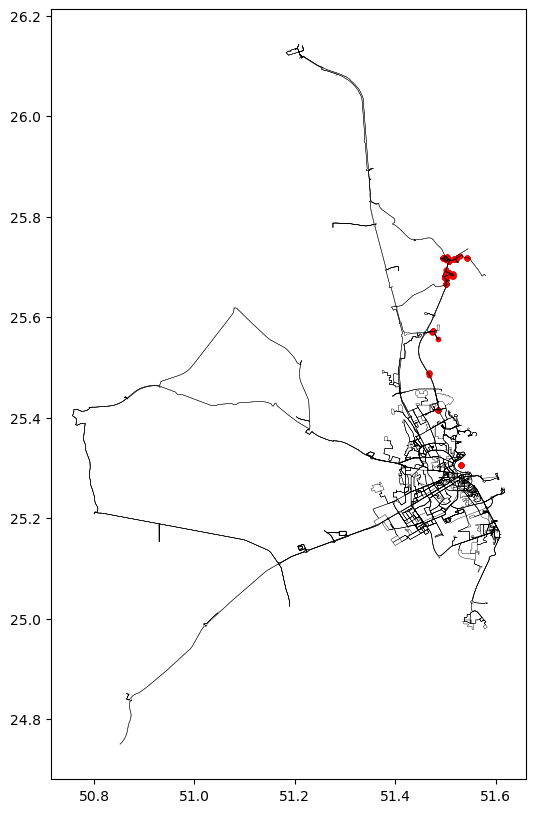

In [260]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import LineString, Point

# Read the stops.txt file into a DataFrame
stops_df = filtered_trips

# Convert the DataFrame to a GeoDataFrame
stops_gdf = gpd.GeoDataFrame(stops_df, geometry=gpd.points_from_xy(stops_df.stop_lon, stops_df.stop_lat))

# Read the shape.txt file into a DataFrame
df = pd.read_csv('shapes.txt')

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.shape_pt_lon, df.shape_pt_lat))

# Group the GeoDataFrame by shape_id and aggregate the points into a LineString geometry
grouped = gdf.groupby('shape_id')['geometry'].apply(lambda x: LineString(x.tolist())).reset_index()

# Convert the DataFrame to a GeoDataFrame
shape_gdf = gpd.GeoDataFrame(grouped, geometry='geometry')

# Define the origin and destination stops
origin_stop_id = nearest_stop_id  # Replace with your origin stop ID
destination_stop_id = nearest_stop_id_dest  # Replace with your destination stop ID

# Get the shape points between the origin and destination stops
origin_stop_index = stops_df[stops_df['stop_id'] == origin_stop_id].index[0]
destination_stop_index = stops_df[stops_df['stop_id'] == destination_stop_id].index[0]
if origin_stop_index < destination_stop_index:
    shape_points = shape_gdf.iloc[origin_stop_index:destination_stop_index + 1]['geometry']
else:
    shape_points = shape_gdf.iloc[destination_stop_index:origin_stop_index + 1]['geometry']

# Plot the shape file and the stops
ax = shape_gdf.plot(figsize=(10, 10), color='black', linewidth=0.3)
stops_gdf.plot(ax=ax, color='red', markersize=10)

# Plot the edges connecting the stops along the route shape
for idx in range(len(shape_points) - 1):
    start_point = shape_points.iloc[idx]
    end_point = shape_points.iloc[idx + 1]
    for stop_id in filtered_trips[(filtered_trips['stop_id'] == origin_stop_id) | (filtered_trips['stop_id'] == destination_stop_id)]['stop_id']:
        if (start_point.x, start_point.y) == (stops_df[stops_df['stop_id'] == stop_id]['stop_lon'].iloc[0], stops_df[stops_df['stop_id'] == stop_id]['stop_lat'].iloc[0]) or \
            (end_point.x, end_point.y) == (stops_df[stops_df['stop_id'] == stop_id]['stop_lon'].iloc[0], stops_df[stops_df['stop_id'] == stop_id]['stop_lat'].iloc[0]):
            plt.plot([start_point.x, end_point.x], [start_point.y, end_point.y], color='blue', linewidth=2)
            plt.annotate(stop_id, (start_point.x, start_point.y), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()


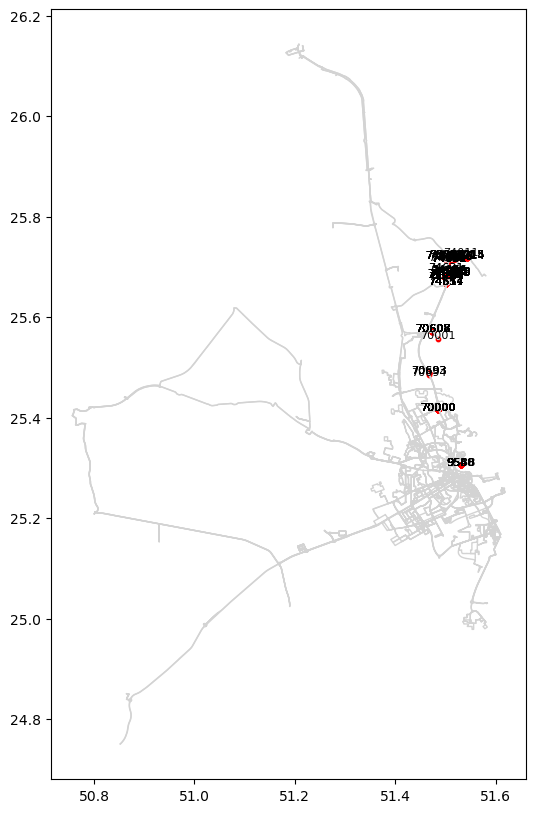

In [261]:
# Plot the shape file and the stops
fig, ax = plt.subplots(figsize=(10, 10))
shape_gdf.plot(ax=ax, color='lightgray', linewidth=1)
stops_gdf.plot(ax=ax, color='red', markersize=10)

# Add labels for the stops
for idx, row in stops_gdf.iterrows():
    ax.annotate(row['stop_id'], (row.geometry.x, row.geometry.y), xytext=(0, 0), textcoords="offset points", ha='center', fontsize=8)

# Plot the edges connecting the stops along the route shape
for idx in range(len(shape_points) - 1):
    start_point = shape_points.iloc[idx]
    end_point = shape_points.iloc[idx + 1]
    for stop_id in filtered_trips[(filtered_trips['stop_id'] == origin_stop_id) | (filtered_trips['stop_id'] == destination_stop_id)]['stop_id']:
        if (start_point.x, start_point.y) == (stops_df[stops_df['stop_id'] == stop_id]['stop_lon'].iloc[0], stops_df[stops_df['stop_id'] == stop_id]['stop_lat'].iloc[0]) or \
            (end_point.x, end_point.y) == (stops_df[stops_df['stop_id'] == stop_id]['stop_lon'].iloc[0], stops_df[stops_df['stop_id'] == stop_id]['stop_lat'].iloc[0]):
            plt.plot([start_point.x, end_point.x], [start_point.y, end_point.y], color='blue', linewidth=2)


plt.show()


0      74011
1      74153
2      74153
3      74153
4      74153
       ...  
287    74654
288    74654
289    74654
290    74014
291    74014
Name: stop_id, Length: 292, dtype: int64


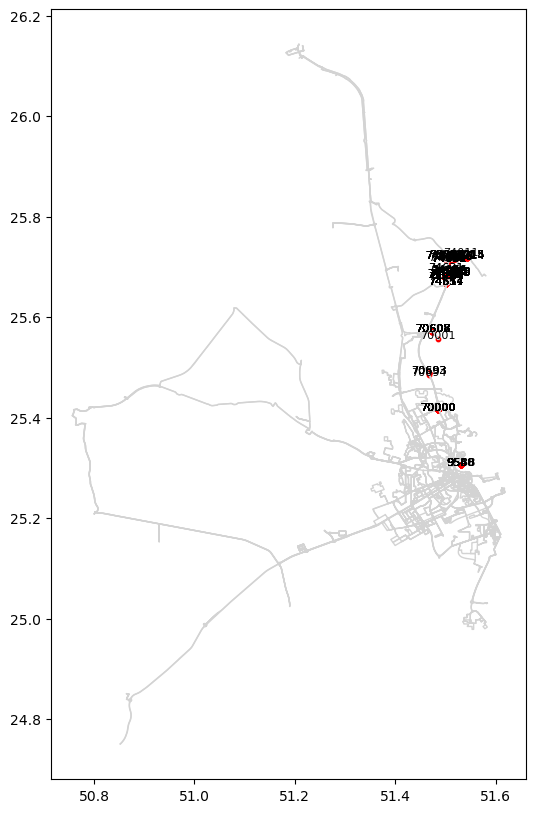

In [262]:
import matplotlib.pyplot as plt
from shapely.geometry import LineString

# Plot the shape file and the stops
fig, ax = plt.subplots(figsize=(10, 10))
shape_gdf.plot(ax=ax, color='lightgray', linewidth=1)
stops_gdf.plot(ax=ax, color='red', markersize=10)

# Add labels for the stops
for idx, row in stops_gdf.iterrows():
    ax.annotate(row['stop_id'], (row.geometry.x, row.geometry.y), xytext=(0, 0), textcoords="offset points", ha='center', fontsize=8)

# Plot the edges connecting the stops along the route shape
for route_id, route_stops in route_stop_mapping.groupby('route_id')['stop_id']:
    print(route_stops)
    valid_stops = [stop_id for stop_id in route_stops if stop_id in stops_gdf.index]
    route_coords = [(stops_gdf.loc[stop_id, 'stop_lon'], stops_gdf.loc[stop_id, 'stop_lat']) for stop_id in valid_stops]
    route_line = LineString(route_coords)
    # Plot the route line with red color
    ax.plot(*route_line.xy, color='red', linewidth=2)

plt.show()


In [263]:
# Merge routes_df with trip_sample_df to obtain stop_id values for each route
route_stop_mapping = pd.merge(trip_sample_df, routes_df, on='route_id')[['route_id', 'stop_id', 'stop_name', 'stop_lon', 'stop_lat']]


In [264]:
# Group the route_stop_mapping DataFrame by route_id and collect stop_id values into a list for each route
routes_grouped = route_stop_mapping.groupby('route_id')['stop_id'].apply(list)

# Convert the grouped Series to a list of lists
routes = [route for route in routes_grouped]

# Example: Print the routes list
print(routes)


[[25107, 25107, 25107, 25107, 25107, 25107, 25107, 25107, 25107, 25107, 25107, 25107, 25107, 25107, 25107, 45043, 45043, 45043, 45043, 45043, 45043, 45043, 45043, 45043, 45043, 45043, 45043, 45043, 45043, 45604, 45604, 45604, 45604, 45604, 45505, 45505, 25107, 25107, 25107, 25107, 25107, 45044, 45044, 45044, 45044, 45044, 45044, 45044, 45044, 45044, 45044, 45044, 45044, 45044, 45044, 45044, 45505, 45505, 45505, 45505, 45505, 45505, 45505, 45604, 45604, 45604, 45604, 45604, 45604, 45604, 45604, 45604, 45602, 45602, 45602, 45602, 45602, 45602, 45602, 45602, 45602, 45602, 45602, 45602, 45602, 45602, 45602, 45602, 45602, 45602, 45602, 45602, 45602, 45602, 45602, 45602, 45602, 45602, 45602, 45602, 45602, 45602, 45602, 45044, 45044, 45044, 45044, 45044, 45044, 45044, 45044, 45044, 45044, 45044, 45044, 45044, 49604, 45026, 45026, 45026, 45026, 45026, 45026, 45026, 45026, 45026, 45026, 45026, 45026, 45026, 45026, 45026, 45026, 45026, 45026, 45026, 45026, 45026, 45026, 45026, 45026, 45026, 4502

In [265]:
import pandas as pd

# Read the stop_times.txt file into a DataFrame
stop_times_df = pd.read_csv('stop_times.txt')

# Sort the DataFrame by trip_id and stop_sequence
stop_times_df.sort_values(by=['trip_id', 'stop_sequence'], inplace=True)

# Convert the arrival_time and departure_time columns to datetime objects
stop_times_df['arrival_time'] = pd.to_datetime(stop_times_df['arrival_time'], format='%H:%M:%S', errors='coerce')
stop_times_df['departure_time'] = pd.to_datetime(stop_times_df['departure_time'], format='%H:%M:%S', errors='coerce')

# Filter out rows with NaT values (invalid time formats)
stop_times_df = stop_times_df.dropna(subset=['arrival_time', 'departure_time'])

# Calculate the time difference between consecutive stops for each trip_id
stop_times_df['time_difference'] = stop_times_df.groupby('trip_id')['arrival_time'].diff()

# Calculate the average time between consecutive stops
average_time = stop_times_df['time_difference'].mean()

print(f"The average time between consecutive stops is {average_time}")


The average time between consecutive stops is 0 days 00:01:59.636099013


In [303]:
# Define the stop IDs for the starting and ending stops
start_stop_id = nearest_stop_id  # Replace with the actual stop ID
end_stop_id = nearest_stop_id_dest
# Replace with the actual stop ID

# Get the row corresponding to the start stop
start_stop_row = stop_times_df[stop_times_df['stop_id'] == start_stop_id].iloc[0]

# Get the row corresponding to the end stop
end_stop_row = stop_times_df[stop_times_df['stop_id'] == end_stop_id].iloc[0]

# Calculate the time difference between the end stop's arrival time and the start stop's departure time
time_difference = (end_stop_row['arrival_time'] - start_stop_row['departure_time']).total_seconds()

# Convert the time difference to minutes
time_difference_minutes = time_difference / 60

print(f"The time between stops {start_stop_id} and {end_stop_id} is approximately {time_difference_minutes:.2f} minutes.")

The time between stops 8897 and 70001 is approximately 16.00 minutes.


In [302]:
import pandas as pd


# Sort the DataFrame by trip_id and stop_sequence
stop_times_df.sort_values(by=['trip_id', 'stop_sequence'], inplace=True)

# Convert the arrival_time and departure_time columns to datetime objects
stop_times_df['arrival_time'] = pd.to_datetime(stop_times_df['arrival_time'], format='%H:%M:%S', errors='coerce')
stop_times_df['departure_time'] = pd.to_datetime(stop_times_df['departure_time'], format='%H:%M:%S', errors='coerce')

# Filter out rows with NaT values (invalid time formats)
stop_times_df = stop_times_df.dropna(subset=['arrival_time', 'departure_time'])

# Define the stop IDs for the starting and ending stops
start_stop_id = nearest_stop_id
end_stop_id = nearest_stop_id_dest  # Replace with the actual stop ID


# Check if the start stop ID exists in the DataFrame
if start_stop_id in stop_times_df['stop_id'].unique():
    start_stop_row = stop_times_df[stop_times_df['stop_id'] == start_stop_id].iloc[0]
else:
    print(f"Start stop ID {start_stop_id} does not exist in the DataFrame.")

# Check if the end stop ID exists in the DataFrame
if end_stop_id in stop_times_df['stop_id'].unique():
    end_stop_row = stop_times_df[stop_times_df['stop_id'] == end_stop_id].iloc[0]
else:
    print(f"End stop ID {end_stop_id} does not exist in the DataFrame.")

# Proceed with further processing only if both start and end stop IDs exist
if (start_stop_id in stop_times_df['stop_id'].unique()) and (end_stop_id in stop_times_df['stop_id'].unique()):
    # Filter the DataFrame to include stops between the start and end stops
    stops_on_way_df = stop_times_df[
        (stop_times_df['trip_id'] == start_stop_row['trip_id']) &
        (stop_times_df['stop_sequence'] >= start_stop_row['stop_sequence']) &
        (stop_times_df['stop_sequence'] <= end_stop_row['stop_sequence'])
    ]

    # Get the list of stop IDs on the way
    stops_on_way_list = stops_on_way_df['stop_id'].tolist()
    
    # Get the index of the destination stop
    destination_stop_index = stops_on_way_list.index(end_stop_id)
    
    # Get the stops on the way to the destination, including the destination stop
    stops_on_way_to_destination = stops_on_way_list[:destination_stop_index + 1]

    print(f"The stops on the way from {start_stop_id} to {end_stop_id} are: {stops_on_way_to_destination}")


The stops on the way from 8897 to 70001 are: [8897, 74654, 70607, 70001]


In [309]:
import geocoder

# Get the current location based on IP address
g = geocoder.ip('me')

# Get the latitude and longitude values
latitude = g.latlng[0]
longitude = g.latlng[1]

print("Latitude:", latitude)
print("Longitude:", longitude)


Latitude: 25.2855
Longitude: 51.531


In [329]:

def get_location_coordinates(location_name):

    g = geocoder.arcgis(location_name)
    return g.latlng

location_name = "Cibriani Qatar"
latitude, longitude = get_location_coordinates(location_name)
print(f"The coordinates of {location_name} are (latitude, longitude):", latitude, longitude)


The coordinates of Cibriani Qatar are (latitude, longitude): 25.285444965000067 51.19314832400005


In [327]:
import geocoder

def get_user_location():
    # Prompt the user to input their location
    location = input("Please enter your location: ")
    
    # Check if the user entered a location
    if location.strip():
        g = geocoder.arcgis(location)
        return g.latlng
    else:
        g = geocoder.ip('me')
        return g.latlng

def main():
    # Get the user's location
    latitude, longitude = get_user_location()
    print(f"Your coordinates are: Latitude: {latitude}, Longitude: {longitude}")

if __name__ == "__main__":
    main()


Please enter your location: 
Your coordinates are: Latitude: 25.2855, Longitude: 51.531


In [330]:
import geocoder

def get_user_location():
    # Prompt the user to input their location
    location = input("Please enter your location: ")
    
    # Check if the user entered a location
    if location.strip():
        g = geocoder.arcgis(location)
        if g.latlng:
            return g.latlng
        else:
            print("Location not found.")
            return None
    else:
        g = geocoder.ip('me')
        return g.latlng

def main():
    # Get the user's location
    location = get_user_location()
    if location:
        latitude, longitude = location
        print(f"Your coordinates are: Latitude: {latitude}, Longitude: {longitude}")
    else:
        print("Unable to determine location.")

if __name__ == "__main__":
    main()


Please enter your location: 
Your coordinates are: Latitude: 25.2855, Longitude: 51.531


In [332]:
from geopy.geocoders import Nominatim

def get_user_location():
    # Prompt the user to input their location
    location = input("Please enter your location: ")

    # Check if the user entered a location
    if location.strip():
        # Append Doha, Qatar to the user's input
        location_query = f"{location}, Doha, Qatar"

        # Create a Nominatim geocoder instance
        geolocator = Nominatim(user_agent="myGeocoder")

        # Use the geocoder to get the location details
        location = geolocator.geocode(location_query)
        
        if location:
            return (location.latitude, location.longitude)
        else:
            print("Location not found.")
            return None
    else:
        g = geocoder.ip('me')
        return g.latlng

def main():
    # Get the user's location
    location = get_user_location()
    if location:
        latitude, longitude = location
        print(f"Your coordinates are: Latitude: {latitude}, Longitude: {longitude}")
    else:
        print("Unable to determine location.")

if __name__ == "__main__":
    main()


Please enter your location: 
Your coordinates are: Latitude: 25.2855, Longitude: 51.531


In [333]:
import requests

def get_location_coordinates(location):
    # Define the Google Maps Geocoding API endpoint and parameters
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"
    params = {
        "address": location,
        "key": "YOUR_API_KEY"
    }

    # Send a request to the Google Maps Geocoding API
    response = requests.get(base_url, params=params)
    data = response.json()

    # Check if the API request was successful
    if data['status'] == 'OK':
        # Extract the latitude and longitude from the response
        coordinates = data['results'][0]['geometry']['location']
        return coordinates['lat'], coordinates['lng']
    else:
        # If the API request was not successful, print the error message
        print("Error:", data['status'])
        return None

def main():
    # Prompt the user to input their location
    location = input("Please enter your location: ")

    # Get the coordinates for the location
    coordinates = get_location_coordinates(location)

    # Check if coordinates were found
    if coordinates:
        latitude, longitude = coordinates
        print(f"Latitude: {latitude}, Longitude: {longitude}")
    else:
        print("Location not found.")

if __name__ == "__main__":

    main()


Please enter your location: 
Error: INVALID_REQUEST
Location not found.


In [338]:
import osmnx as ox
import geocoder

# Set up OSMnx
ox.config(use_cache=True, log_console=True)

# Define a function to get the user's location from the address using OSMnx
def get_location_from_address(address):
    # Use OSMnx to get the location
    g = ox.geocode_to_gdf(address)
    
    # Extract the latitude and longitude
    latitude = g.geometry.y.values[0]
    longitude = g.geometry.x.values[0]
    
    return latitude, longitude

# Modify the get_user_location function to use this new function to get the user's location from the address they provide
def get_user_location():
    # Prompt the user to input their location
    location = input("Please enter your location: ")
    
    # Check if the user entered a location
    if location.strip():
        # Get the user's location from the address
        latitude, longitude = get_location_from_address(location)
    else:
        # Get the user's location from their IP address
        g = geocoder.ip('me')
        latitude, longitude = g.latlng
    
    return latitude, longitude

def main():
    # Get the user's location
    latitude, longitude = get_user_location()
    print(f"Your coordinates are: Latitude: {latitude}, Longitude: {longitude}")

if __name__ == "__main__":
    main()

    

C:\Users\kosman\AppData\Local\Temp\ipykernel_15496\3738495345.py:5: FutureWarning: The `utils.config` function is deprecated and will be removed in the v2.0.0 release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(use_cache=True, log_console=True)


Please enter your location: 
Your coordinates are: Latitude: 25.2855, Longitude: 51.531
